## Section 6b: Introduction to Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split

### Section 6b.1 K-Means Clustering

#### Section 6b.1.1 K-Means Clustering: centroid based dataset

In [ ]:
def k_mean_distance(data, centroids, cluster_labels):
  full_distances = []
  for i_centroid in range(0, max(cluster_labels) + 1):
    cx = centroids[i_centroid, 0]
    cy = centroids[i_centroid, 1]
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    full_distances.extend(distances)
  return np.mean(full_distances)

In [ ]:
X, y = make_blobs(n_samples=10, centers=2, cluster_std=.2, n_features=2, random_state=20)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

In [ ]:
label = kmeans.labels_
X0 = X[label == 0]
X1 = X[label == 1]

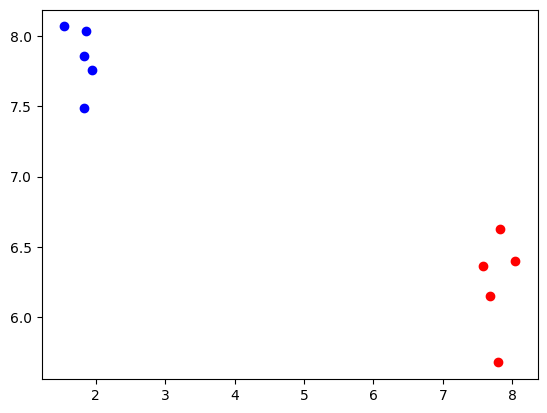

In [ ]:
plt.scatter(X0[:,0] , X0[:,1] , color = 'red')
plt.scatter(X1[:,0] , X1[:,1] , color = 'blue')

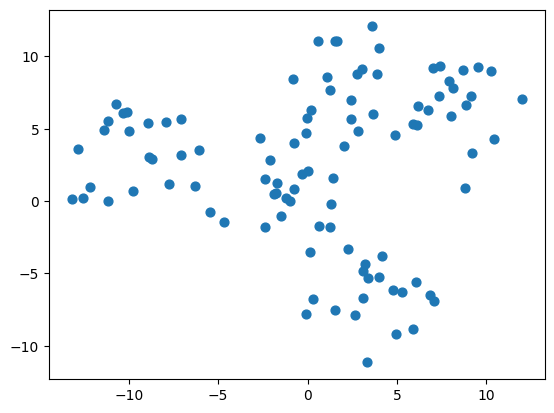

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=40)
plt.show()

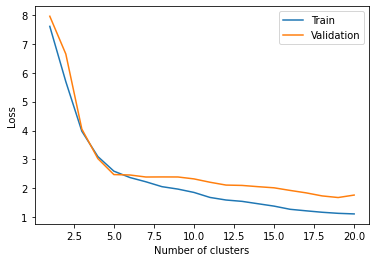

In [ ]:
X_train, X_valid, _, _ = train_test_split(X, y, test_size=0.2, random_state=0)
loss_train, loss_valid = [], []
max_cluster = 20

for k in np.arange(max_cluster)+1:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)

    centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.predict(X_train)
    loss_train.append(k_mean_distance(X_train, centroids, cluster_labels))

    cluster_labels = kmeans.predict(X_valid)
    loss_valid.append(k_mean_distance(X_valid, centroids, cluster_labels))

plt.plot(np.arange(max_cluster)+1, loss_train, label='Train')
plt.plot(np.arange(max_cluster)+1, loss_valid, label='Validation')

plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.legend(loc='upper right')

#### Section 6b.2 K-Means Clustering: distance based dataset

In [ ]:
def create_dataset(N, K=3):
  # N is the number of points per cluster.
  # K is the number of cluster.
  # D is the number of dimensions.
  # X will be the x-y coordinates in the two dimensional space
  # y will be the label assigned to the point. it takes value from 0 to K-1

  N = 100
  D = 2
  X = np.zeros((N * K, D))
  y = np.zeros(N * K)

  for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(2, 5, N)
    t = np.linspace(j * 2, (j + 1) * 2, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

  y = y.astype(int)

  plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
  plt.show()

  return X, y

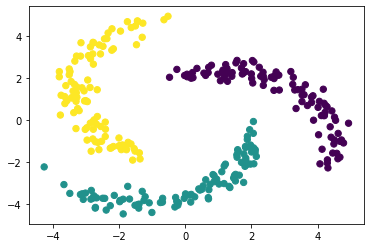

In [ ]:
X, y = create_dataset(N=300, K=3)

In [ ]:
def plot_division(kmeans, X, centroids):
  h = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired, aspect="auto", origin="lower")

  plt.plot(X[:, 0], X[:, 1], "k.", markersize=5)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
centroids = kmeans.cluster_centers_
cluster_labels = kmeans.predict(X)
k_mean_distance(X, centroids, cluster_labels)

2.5319197956481996

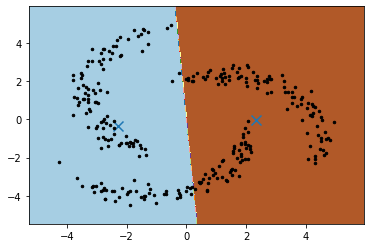

In [ ]:
plot_division(kmeans, X, centroids)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
centroids = kmeans.cluster_centers_
cluster_labels = kmeans.predict(X)
k_mean_distance(X, centroids, cluster_labels)

1.8649020372782146

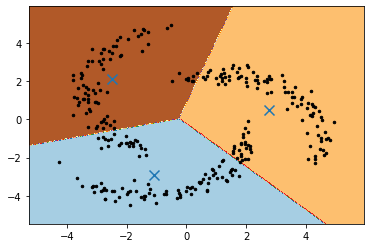

In [ ]:
plot_division(kmeans, X, centroids)

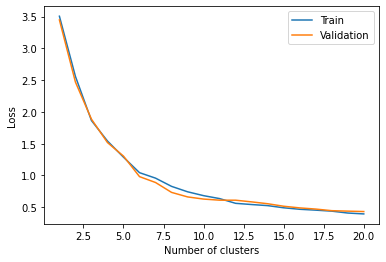

In [ ]:
X_train, X_valid, _, _ = train_test_split(X, y, test_size=0.2, random_state=0)
loss_train, loss_valid = [], []
max_cluster = 20

for k in np.arange(max_cluster)+1:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)

    centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.predict(X_train)
    loss_train.append(k_mean_distance(X_train, centroids, cluster_labels))

    cluster_labels = kmeans.predict(X_valid)
    loss_valid.append(k_mean_distance(X_valid, centroids, cluster_labels))

plt.plot(np.arange(max_cluster)+1, loss_train, label='Train')
plt.plot(np.arange(max_cluster)+1, loss_valid, label='Validation')

plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.legend(loc='upper right')

### Section 6b.2 DBScan Clustering

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=1, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 1


In [ ]:
def plot_dbscan(labels):
  unique_labels = set(labels)
  core_samples_mask = np.zeros_like(labels, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True

  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
    if k == -1:
      col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markersize=10)

  plt.title(f"Estimated number of clusters: {n_clusters_}")
  plt.show()

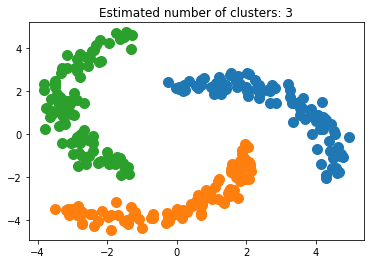

In [ ]:
plot_dbscan(labels)

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

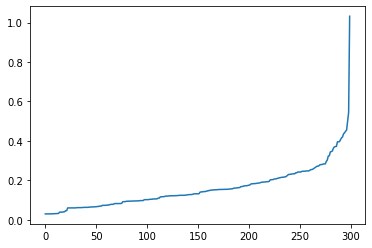

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Section 6b.3 Unsupervised Learning for Dimensionality Reduction

#### Section 6b.3.1 t-SNE for MNIST

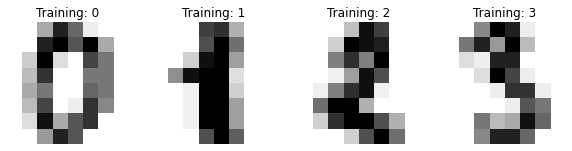

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
x, y, z = digits.images.shape
X = digits.images.reshape(x, y * z)
X.shape

(1797, 64)

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(1797, 2)

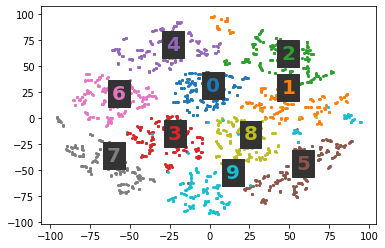

In [ ]:
for i in np.unique(digits.target):
  temp_index = digits.target == i
  xy = X_embedded[temp_index]
  center_x = np.mean(xy[:, 0])
  center_y = np.mean(xy[:, 1])

  plt.plot(xy[:, 0], xy[:, 1], "o", markersize=2)
  temp_color = plt.gca().lines[-1].get_color()
  plt.text(center_x, center_y, str(i), size=20, c=temp_color, fontweight="extra bold", backgroundcolor="#333333")

#### Section 6b.3.2 PCA for Facial Reconstruction

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

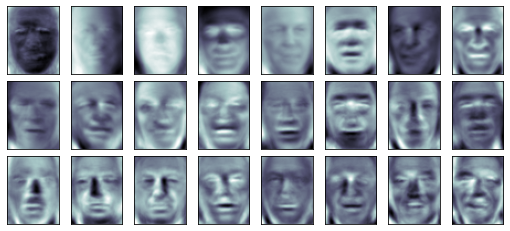

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

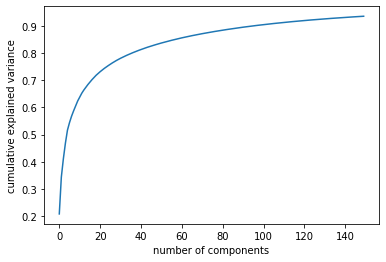

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Compute the components and projected faces
pca = RandomizedPCA(1).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

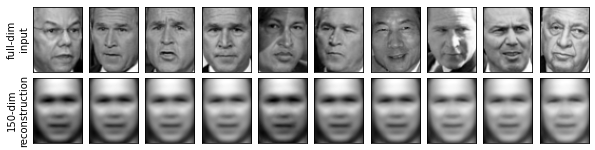

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');